In [71]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt

def render(spec, rounds=10, columns=None):
    model = parse(spec)
    plt.close('all')
    results = model.run(rounds=rounds)[1:]
    df = pd.DataFrame.from_records(results, columns=columns)
    df.cumsum()
    plt.figure();
    return df.plot(figsize=(12, 4));

def dot(spec):
    "Render via graphviz."
    model = parse(spec)
    return as_dot(model)

def table(spec, rounds=10):
    "Shows first five and last five rows."
    model = parse(spec)
    results = model.run(rounds=rounds)[1:]
    return HTML(model.render_html(results))

def raw_table(spec, rounds=10):
    "Exportable HTML you could embed somewhere."
    model = parse(spec)
    results = model.run(rounds=rounds)[1:]
    rendered = model.render_html(results)
    return rendered.replace('\n','').replace("<table>", "<table class=\"table table-bordered\">")

Round,Projects,Started,Finished
0,1,0,0
1,1,1,0
2,1,1,1
3,1,1,2
4,1,1,3
5,1,1,4
6,1,1,5
7,1,1,6
8,1,1,7
9,1,1,8


<Figure size 432x288 with 0 Axes>

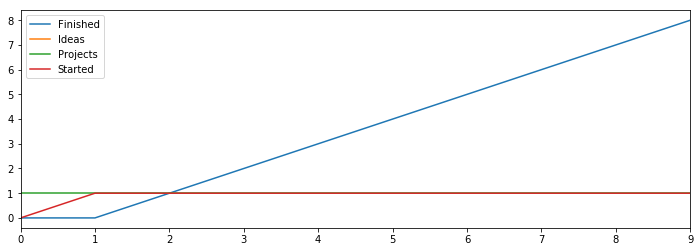

In [73]:
spec = """
[Ideas] > Projects @ 1
Projects > Started @ 1
Started > Finished @ 1
"""
rounds=10
render(spec, rounds=rounds)
table(spec, rounds=rounds)

<Figure size 432x288 with 0 Axes>

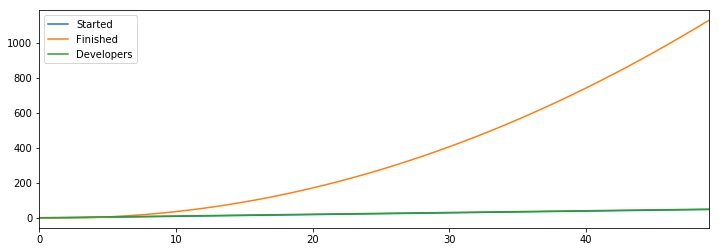

In [74]:
spec = """
[Hires] > Developers @ 1
[Ideas] > Projects   @ Developers
Projects > Started   @ Developers
Started > Finished   @ Developers
"""
render(spec, rounds=50, columns=["Started", "Finished", "Developers"])

Round,Developers,Projects,Started,Finished
0,2,0,0,0
1,4,2,0,0
2,6,4,2,0
3,8,6,4,2
4,10,8,6,6
5,12,10,10,10
6,14,12,18,12
7,16,14,30,12
8,18,16,44,12
9,20,18,60,12


<Figure size 432x288 with 0 Axes>

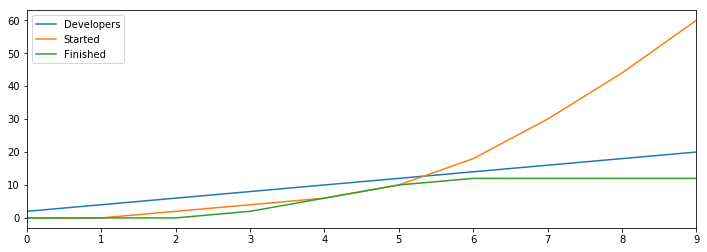

In [75]:
spec = """
[Hires] > Developers @ 2
[Ideas] > Projects   @ Developers
Projects > Started   @ Developers
Started > Finished   @ Developers - Started
"""

rounds=10
render(spec, rounds=rounds, columns=["Developers", "Started", "Finished"])
table(spec, rounds=rounds)

Round,Developers,Projects,Started,Finished
0,2,0,0,0
1,4,2,0,0
2,6,4,2,0
3,8,6,4,2
4,10,8,6,6
5,12,8,10,10
6,14,8,12,12
7,16,8,14,14
8,18,8,16,16
9,20,8,18,18


<Figure size 432x288 with 0 Axes>

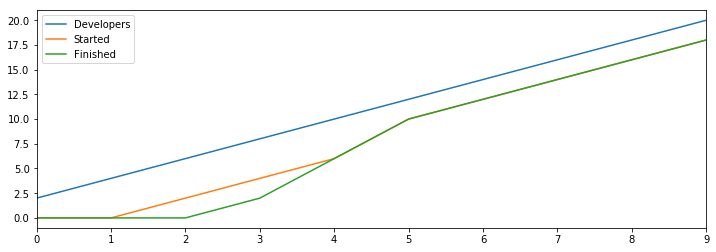

In [76]:
spec = """
[Hires] > Developers @ 2
[Ideas] > Projects   @ Developers - Started
Projects > Started   @ Developers - Started
Started > Finished   @ Developers - Started
"""

rounds=10
render(spec, rounds=rounds, columns=["Developers", "Started", "Finished"])
table(spec, rounds=rounds)

Round,Developers,Projects,Started,Finished
0,2,0,0,0
1,4,2,0,0
2,6,4,2,0
3,8,6,4,2
4,10,8,6,6
5,12,10,8,10
6,14,14,8,14
7,16,16,12,20
8,18,24,8,24
9,20,24,18,32


<Figure size 432x288 with 0 Axes>

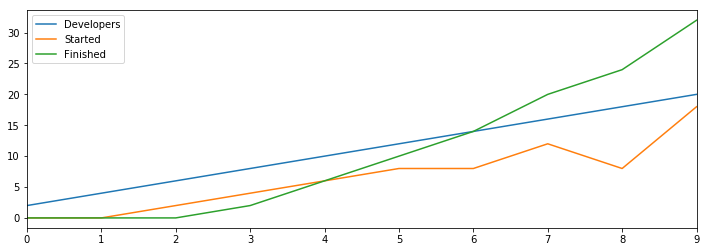

In [77]:
spec = """
[Hires] > Developers @ 2
[Ideas] > Projects   @ Developers - Started
Projects > Started   @ Developers - (2 * Started)
Started > Finished   @ Developers - Started
"""
rounds=10
render(spec, rounds=rounds, columns=["Developers", "Started", "Finished"])
table(spec, rounds=rounds)

Round,Reprioritization,Developers,Projects,Started,Finished
0,1,2,0,0,0
1,1,4,2,0,0
2,1,6,4,2,0
3,1,8,6,4,2
4,1,10,7,7,5
5,1,12,7,10,7
6,1,14,7,12,8
7,1,16,7,14,9
8,1,18,7,16,10
9,1,20,7,18,11


<Figure size 432x288 with 0 Axes>

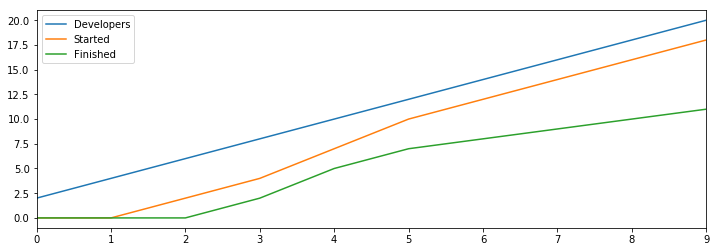

In [78]:
spec = """
Reprioritization(1)
[Hires]  > Developers @ 2
[Ideas]  > Projects   @ Developers - Started
Projects > Started   @ Developers - Started
Started  > Finished   @ Developers - Started - Reprioritization
"""
rounds=10
render(spec, rounds=rounds, columns=["Developers", "Started", "Finished"])
table(spec, rounds=rounds)

Round,Reprioritization,Developers,Projects,Started,Finished
0,1,2,0,0,0
1,1,4,2,0,0
2,1,6,4,2,0
3,1,8,6,4,2
4,1,10,7,7,5
5,1,12,12,5,7
6,1,14,12,12,12
7,1,16,15,11,13
8,1,18,22,9,17
9,1,20,23,17,25


<Figure size 432x288 with 0 Axes>

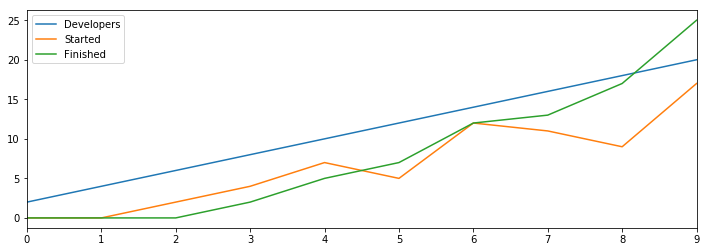

In [79]:
spec = """
Reprioritization(1)
[Hires]  > Developers @ 2
[Ideas]  > Projects   @ Developers - Started
Projects > Started   @ Developers - (2 * Started)
Started  > Finished   @ Developers - Started - Reprioritization
"""
rounds=10
render(spec, rounds=rounds, columns=["Developers", "Started", "Finished"])
table(spec, rounds=rounds)